<b><font size=12, color='Red'>Analyzing Atlantic Basin Tropical Cyclones

Downloaded the Atlantic hurricane database (HURDAT2) 1851-2020 (6.2MB download) data from https://www.nhc.noaa.gov/data/#hurdat 

Information about the HURDAT2 dataset can be found at https://www.nhc.noaa.gov/data/hurdat/hurdat2-format-nov2019.pdf

<b><font size=20, color='blue'>Part 1:

import statements and reading in the data to get a usable dataframe that is easier to analyze

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec

In [2]:
#This and the next cell block code allows us to get the storm number, name, class, and location of each storm then from
#there we can read it more easily

def lat_lon_to_float(x):
    """
    This function converts strings from NHC dataset to float locations. 
    """
    if (x[-1] == 'S' or (x[-1] == 'W')):
        multiplier = -1     #makes latitudes in S.Hemi negative along with longitudes in the W.Hemi
    else:
        multiplier = 1      #N.Hemi lats and E.Hemi lons can stay positive values
    return float(x[:-1]) * multiplier

In [3]:
#edited from pandas lecture to make datetime and pandas dataframe
#Also used help from https://unidata.github.io/python-gallery/examples/HurricaneTracker.html 
data = []

with open('HURDAT2.txt', 'r') as f:
    for line in f.readlines():
        if line.startswith('AL'):                #our header in the dataset start with 'AL' for all storms
            storm_id = line.split(',')          #storm identifying info is split up by commas
            number = storm_id[0].strip()  #storm number is the 1st item in storm_id, .strip() strips any white space
            name = storm_id[1].strip()    #storm name is the 2nd item in storm_id
        else:                                   #if line doesn't start with 'AL', then we are still looking at the same storm
            storm_info = line.split(',')     #location info split by commas
            dt = datetime.strptime(storm_info[0] + storm_info[1], '%Y%m%d %H%M')
            status = storm_info[3].strip()   #status is 4th item in location_info
            wind_spd = int(storm_info[6].strip()) #wind speed is 7th item in location_info
            min_press = int(storm_info[7].strip()) #pressure is 8th item in location_info
            lat = lat_lon_to_float(storm_info[4].strip()) #latitude is the 5th item in location_info
            lon = lat_lon_to_float(storm_info[5].strip()) #longitude is the 6th item in location_info
            data.append([number, name, status, wind_spd, min_press, lat, lon, dt]) #append all our variables to our empty data list
            

In [4]:
#Make a dataframe out of our data
df = pd.DataFrame(data, columns = ['Storm Number', 'Name', 'Status', 'Wind Speed (knots)', ' Minimum Pressure (hPa)','Latitude', 'Longitude', 'Date/Time'])

In [5]:
df = df.replace(-999, 'No Data') #Replaces missing data which is given by values of -999, to say 'No Data'
df

Storm Number     Name Status  Wind Speed (knots)  \
0         AL011851  UNNAMED     HU                  80   
1         AL011851  UNNAMED     HU                  80   
2         AL011851  UNNAMED     HU                  80   
3         AL011851  UNNAMED     HU                  80   
4         AL011851  UNNAMED     HU                  80   
...            ...      ...    ...                 ...   
52712     AL312020     IOTA     HU                  75   
52713     AL312020     IOTA     TS                  55   
52714     AL312020     IOTA     TS                  40   
52715     AL312020     IOTA     TS                  35   
52716     AL312020     IOTA     TD                  25   

       Minimum Pressure (hPa)  Latitude  Longitude           Date/Time  
0                     No Data      28.0      -94.8 1851-06-25 00:00:00  
1                     No Data      28.0      -95.4 1851-06-25 06:00:00  
2                     No Data      28.0      -96.0 1851-06-25 12:00:00  
3                     No Data      28.1      -96.5 1851-06-25 18:00:00  
4                     No Data      28.2      -96.8 1851-06-25 21:00:00  
...                       ...       ...        ...                 ...  
52712                     965      13.7      -84.7 2020-11-17 12:00:00  
52713                     988      13.7      -85.7 2020-11-17 18:00:00  
52714                    1000      13.8      -86.7 2020-11-18 00:00:00  
52715                    1005      13.8      -87.8 2020-11-18 06:00:00  
52716                    1006      13.7      -89.0 2020-11-18 12:00:00  

[52717 rows x 8 columns]

<b><font size=15, color='blue'>Part 2:

Analyzing data and making plots

In [6]:
#how many unique storms are there
len(df['Storm Number'].unique())

1924

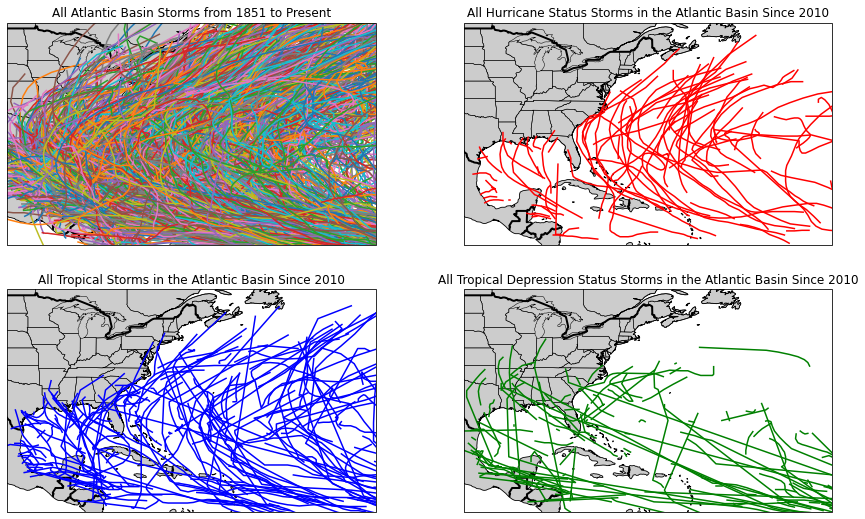

In [7]:
#Edited from metpy lecture and homework 3

gs = gridspec.GridSpec(nrows=2,ncols=2)
fig = plt.figure(figsize=(15,9))

#Data projection and map projection
data_proj=ccrs.PlateCarree()

#Create the figure and add a subplot
ax1 = fig.add_subplot(gs[0,0], projection = data_proj)
ax1.set_extent([-100, -37, 12, 50], ccrs.PlateCarree()) #lat/lon bounds are [West,East,South,North]
# Add land, coastlines, and borders
ax1.add_feature(cfeature.LAND, facecolor='0.8')
ax1.add_feature(cfeature.BORDERS, linewidth=2, edgecolor="black")
ax1.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.5)
ax1.coastlines('50m', linewidth=0.8)
ax1.set_title('All Atlantic Basin Storms from 1851 to Present', fontsize = 12)

for number in df['Storm Number'].unique():    #goes over every new unique storm in our dataframe
    data = df[df['Storm Number'] == number]   
    ax1.plot(data['Longitude'], data['Latitude'], transform = data_proj)

#plot2

#create a dataframe where it only contains storms with a hurricane status
df_hurricane = df[df['Status'] == 'HU']  # Looking at NHC manual on this dataset, HU corresponds to hurricane
#can also limit the number of storms by date, in this case it is the last 10 years of data
df_hurricane = df_hurricane[df_hurricane['Date/Time'] > datetime(2020 - 10, 1, 1)] 

#Data projection and map projection
data_proj=ccrs.PlateCarree()
map_proj = ccrs.LambertConformal(central_longitude=-100,central_latitude=35,
                               standard_parallels=(33, 45))

#Create the figure and add a subplot
ax2 = fig.add_subplot(gs[0,1], projection = data_proj)
ax2.set_extent([-100, -37, 12, 50], ccrs.PlateCarree()) #lat/lon bounds are [West,East,South,North]
# Add land, coastlines, and borders
ax2.add_feature(cfeature.LAND, facecolor='0.8')
ax2.add_feature(cfeature.BORDERS, linewidth=2, edgecolor="black")
ax2.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.5)
ax2.coastlines('50m', linewidth=0.8)
ax2.set_title('All Hurricane Status Storms in the Atlantic Basin Since 2010', fontsize = 12)
for storm in df_hurricane['Storm Number'].unique():    
    data = df_hurricane[df_hurricane['Storm Number'] == storm]   
    ax2.plot(data['Longitude'], data['Latitude'], transform = data_proj, color = 'red')
    
#plot3

df_tc = df[df['Status'] == 'TS']
df_tc = df_tc[df_tc['Date/Time'] > datetime(2020 - 10, 1, 1)]
#Create the figure and add a subplot
ax3 = fig.add_subplot(gs[1,0], projection = data_proj)
ax3.set_extent([-100, -37, 12, 50], ccrs.PlateCarree()) #lat/lon bounds are [West,East,South,North]
# Add land, coastlines, and borders
ax3.add_feature(cfeature.LAND, facecolor='0.8')
ax3.add_feature(cfeature.BORDERS, linewidth=2, edgecolor="black")
ax3.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.5)
ax3.coastlines('50m', linewidth=0.8)
ax3.set_title('All Tropical Storms in the Atlantic Basin Since 2010', fontsize = 12)
for storm in df_tc['Storm Number'].unique():    
    data = df_tc[df_tc['Storm Number'] == storm]   
    ax3.plot(data['Longitude'], data['Latitude'], transform = data_proj, color = 'blue')
    
#plot4

df_td = df[df['Status'] == 'TD']
df_td = df_td[df_td['Date/Time'] > datetime(2020 - 10, 1, 1)]
#Create the figure and add a subplot
ax4 = fig.add_subplot(gs[1,1], projection = data_proj)
ax4.set_extent([-100, -37, 12, 50], ccrs.PlateCarree()) #lat/lon bounds are [West,East,South,North]
# Add land, coastlines, and borders
ax4.add_feature(cfeature.LAND, facecolor='0.8')
ax4.add_feature(cfeature.BORDERS, linewidth=2, edgecolor="black")
ax4.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.5)
ax4.coastlines('50m', linewidth=0.8)
ax4.set_title('All Tropical Depression Status Storms in the Atlantic Basin Since 2010', fontsize = 12)
for storm in df_td['Storm Number'].unique():    
    data = df_td[df_td['Storm Number'] == storm]   
    ax4.plot(data['Longitude'], data['Latitude'], transform = data_proj, color = 'green')
    
plt.show()

In [8]:
td = []
ts = []
cat1 = []
cat2 = []
cat3 = []
cat4 = []
cat5 = []

for wind in df['Wind Speed (knots)']:
    if wind < 34:
        td.append(wind)   #Tropical Depression is 33 knots or less
    elif wind < 64:
        ts.append(wind)   #Tropical Storm is between 34 and 63 knots
    elif wind < 83:
        cat1.append(wind) #Category 1 hurricane is between 64 and 82 knots
    elif wind < 96:
        cat2.append(wind) #Category 2 is between 83 and 95 knots
    elif wind < 113:
        cat3.append(wind) #Category 3 is between 96 and 112 knots
    elif wind < 137:
        cat4.append(wind) #Category 4 is between 113 and 136 knots
    else: 
        cat5.append(wind) #Category 5 is anything greater than 137 knots
        

print(len(td)) 
print(len(ts)) 
print(len(cat1)) 
print(len(cat2))  
print(len(cat3)) 
print(len(cat4)) 
print(len(cat5)) 

12999
23906
8636
3980
1998
1030
168


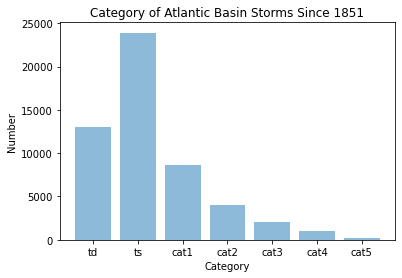

In [9]:
storm_status = ('td', 'ts', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5')
number = [len(td), len(ts), len(cat1), len(cat2), len(cat3), len(cat4), len(cat5)]

plt.bar(storm_status, number, align='center', alpha=0.5)
plt.ylabel('Number')
plt.xlabel('Category')
plt.title('Category of Atlantic Basin Storms Since 1851')

plt.show()

#To answer the question you asked in my monday presentation, this loop and my dataset counts every single wind speed in the 
#dataset every 6 hours. So, if a storm starts as a tropical depression, then intensifies into a hurricane, and weakens again
#into a tropical depression, then a depression will be counted twice. Also, if a storm is at a certain wind speed for longer
#than 6 hours it will be counted multiple times since the dataset is taken at 6 hour intervals for each storm. 
#For example, if a storm is at 100 knots for 24 hours, it will be counted as a cat3 storm 4 times according to my loop.
#So, this may not be the most accurate way to plot storm categories.

In [10]:
#The NHC has many different categories for storms, many of which I didn't account for in my last plot. 
#TD – Tropical cyclone of tropical depression intensity (< 34 knots)
#TS – Tropical cyclone of tropical storm intensity (34-63 knots)
#HU – Tropical cyclone of hurricane intensity (> 64 knots)
#EX – Extratropical cyclone (of any intensity)
#SD – Subtropical cyclone of subtropical depression intensity (< 34 knots)
#SS – Subtropical cyclone of subtropical storm intensity (> 34 knots)
#LO – A low that is neither a tropical cyclone, a subtropical cyclone, nor an extratropical cyclone (of any intensity)
#WV – Tropical Wave (of any intensity)
#DB – Disturbance (of any intensity)

#So the differences in the next plot and my last one could be due to some wind speeds corresponding to multiple categories 
#according to NHC. For example, a 34 knot storm could be correlated to a TD or SD, and my last loop only counted it as TD.
#So this next plot is a more accurate way of describing each category storm.

In [11]:
td = []
ts = []
hu = []
ex = []
sd = []
ss = []
lo = []
wv = []
db = []

for status in df['Status']:
    if status == 'TD':
        td.append(status)   #td = Tropical Depression
    elif status == 'TS':
        ts.append(status)   #ts = tropical storm
    elif status == 'HU':
        hu.append(status)   #hu = hurricane
    elif status == 'EX':
        ex.append(status)   #ex = extratropical cyclone
    elif status == 'SD':
        sd.append(status)   #sd = subtropical cyclone
    elif status == 'SS':
        ss.append(status)   #ss = subtropical storm
    elif status == 'LO': 
        lo.append(status)   #lo = low
    elif status == 'WV': 
        wv.append(status)   #wv = Tropical wave
    else:
        db.append(status)   #db = disturbance
        

print(len(td)) 
print(len(ts)) 
print(len(hu)) 
print(len(ex))  
print(len(sd)) 
print(len(ss)) 
print(len(lo))
print(len(wv))
print(len(db))

10184
19187
15192
5532
309
636
1376
138
163


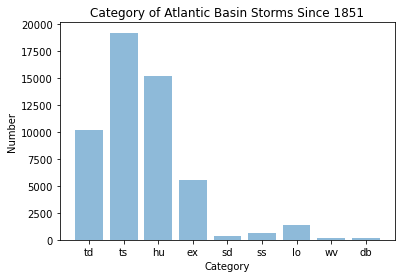

In [12]:
storm_status = ('td', 'ts', 'hu', 'ex', 'sd', 'ss', 'lo', 'wv', 'db')
number = [len(td), len(ts), len(hu), len(ex), len(sd), len(ss), len(lo), len(wv), len(db)]

plt.bar(storm_status, number, align='center', alpha=0.5)
plt.ylabel('Number')
plt.xlabel('Category')
plt.title('Category of Atlantic Basin Storms Since 1851')

plt.show()

 